# Distance Metrics
In this notebook we will investigate a couple of common distance metrics

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

The three distance metrics we will investigate are
#### Euclidean:
$$d_{\text{euclidean}}(A, B) = \sqrt{\sum_{i=1}^n (A_i - B_i)^2}$$
#### Manhattan:
$$d_{\text{manhattan}}(A, B) = \sum_{i=1}^n |A_i - B_i|$$
#### Cosine:
$$d_{\text{cosine}}(A, B) = 1 - \frac{A \cdot B}{\|A\| \|B\|}$$

In [137]:
def euclidean_distance(vec1, vec2, *args):
    return np.linalg.norm(vec1 - vec2)

def manhattan_distance(vec1, vec2, *args):
    return np.sum(np.abs(vec1 - vec2))

def cosine_distance(vec1, vec2, *args):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return 1 - (dot_product / (norm_vec1 * norm_vec2))

To get an intuition about how these metrics behave, here is a function that plots a heatmap of the metric calculated from the origin (0,0)

In [138]:
def plot_distance_heatmap(distance_metrics, x_range=(-20, 20), y_range=(-20, 20), resolution=200, names='', **kwargs):
    """
    Plots a heatmap of the given distance metric for 2D vectors over a specified range.

    Parameters:
    - distance_metric: A function that takes two 2D vectors and returns a scalar distance.
    - x_range: A tuple specifying the range of x values (min, max).
    - y_range: A tuple specifying the range of y values (min, max).
    - resolution: The number of points along each axis.
    """
    # Generate a grid of points
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    ps = kwargs.get('ps', [None for el in distance_metrics])
    
    fig, axs = plt.subplots(nrows=ceil(len(distance_metrics) / 2), ncols=2, figsize=(8, 6))
    
    for idx, (name, metric, ax) in enumerate(zip(names, distance_metrics, axs.flatten())):
        # Compute the distance metric for each point in the grid
        Z = np.zeros_like(X)
        for i in range(resolution):
            for j in range(resolution):
                vector = np.array([X[i, j], Y[i, j]])
                Z[i, j] = metric(vector, np.array([1e-5, 1e-5]), ps[idx])
        # Plot the heatmap
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid("both")
        ax.set_title(f'{name}')
        cont = ax.contourf(X, Y, Z, cmap='viridis')
        fig.colorbar(cont, label='Distance', ax=ax)
    plt.tight_layout()
    plt.show()

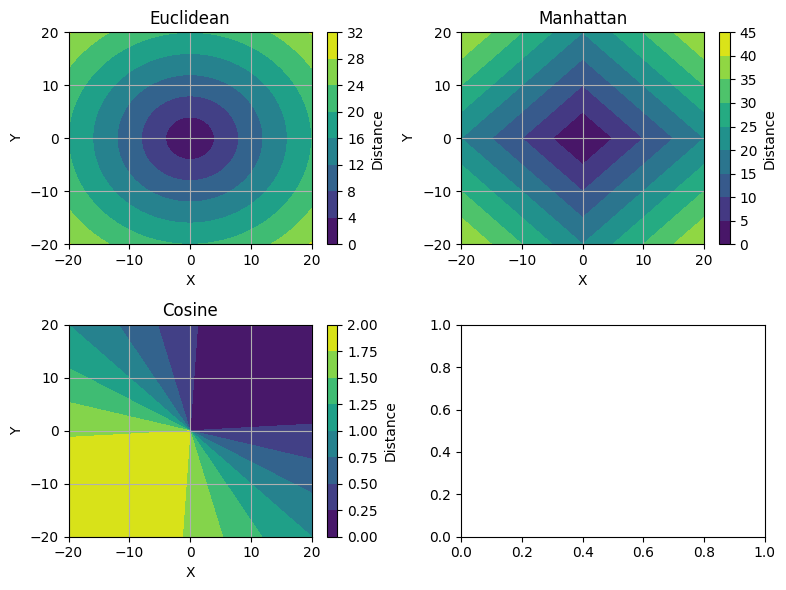

In [139]:
plot_distance_heatmap((euclidean_distance, manhattan_distance, cosine_distance), names=("Euclidean", "Manhattan", "Cosine",))

The Minowski distance is a general formulation with a parameter p that specifies which norm to use. The Manhattan and Euclidean Distances are simply Minowski with p=1 and p=2 often called L1 and L2.

In [140]:
def minkowski_distance(vec1, vec2, p):
    return np.power(np.sum(np.power(np.abs(vec1 - vec2), p)), 1/p)

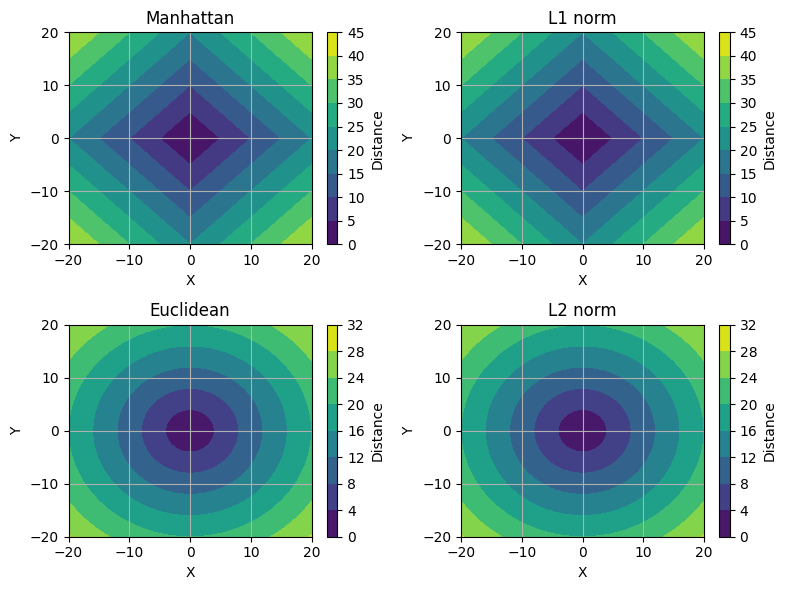

In [141]:
plot_distance_heatmap((manhattan_distance, minkowski_distance, euclidean_distance, minkowski_distance), names=("Manhattan", "L1 norm", "Euclidean", 'L2 norm'), ps=[1, 1, 2, 2])

Now we investigate what happens when you approach the limits of 0 and infinity:
Pay close attention to the values of the axes, if we increase/decrease by much more we run into under/overflow issues!!

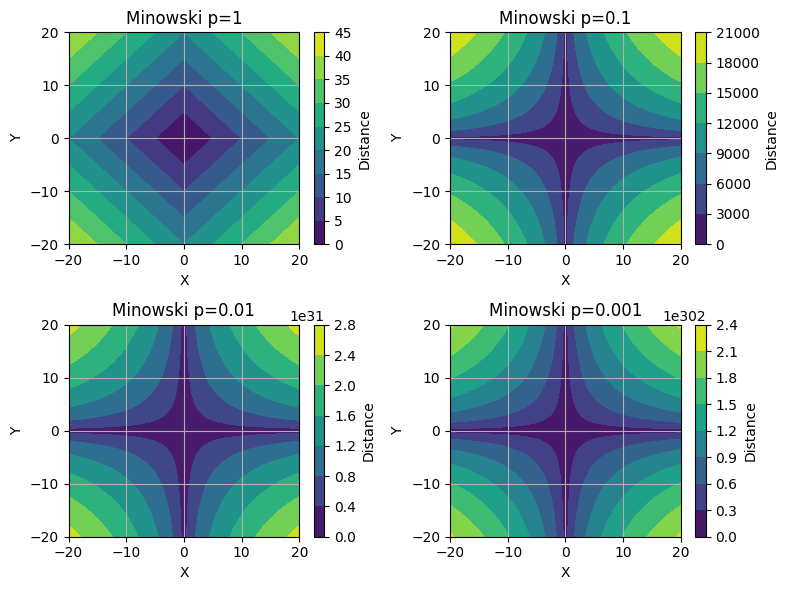

In [142]:
ps = [1, 1e-1, 1e-2, 1e-3]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)

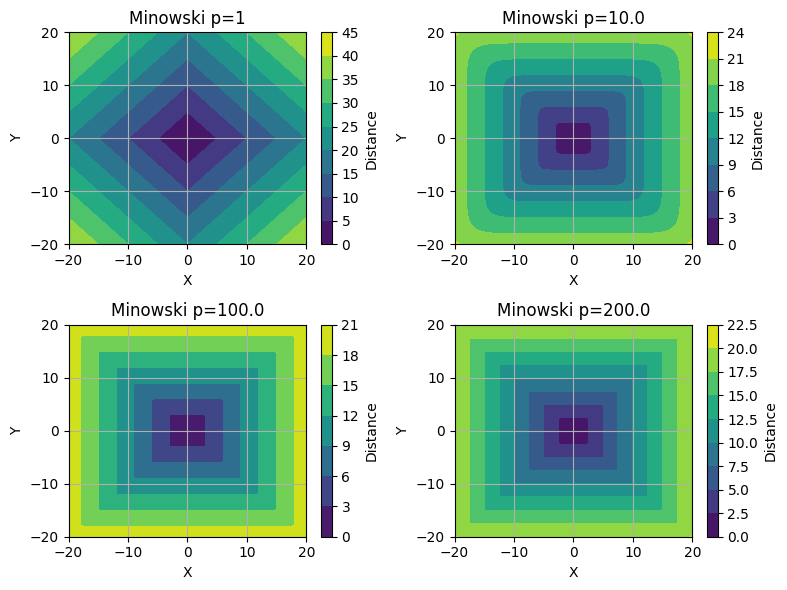

In [143]:
ps = [1, 1e+1, 1e+2, 2e+2]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)